<a href="https://colab.research.google.com/github/tuongnguyenDS/Sklearn_Supervised_Learning/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning All in One with Sklearn

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE                      #recursive feature elimination
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import load_wine
from sklearn.datasets import load_boston


from sklearn.pipeline import make_pipeline
import pickle

    
    

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

# I: Supervised Learning method:

## 1: KNN:

> Two tuning hyperparameters for KNN is: Number of K and how you measure distance between data points. With higher number of K, model will be decrease the degree of overfitting

> Advantage:
1. Easy to understand and explain
2. Training is fast

> Disadvantage:
1. Slow speed for prediction
2. This approach often does not perform well on datasets with many features or features having a lot of 0.



#### 1.1: KNN for Classification:

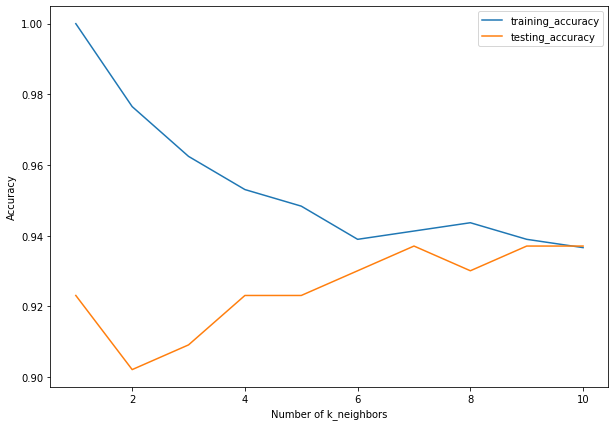

In [ ]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=21)
#strtify được sử dụng để đánh dấu là data được split có phân phối giống với cancer.target

training_accuracy=[]
test_accuracy=[]

#try n_neighbors from 1 to 10
neighbors_setting = range(1,11)

#Train model:
for n_neighbors in neighbors_setting:
  #build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  #record training set accuracy:
  training_accuracy.append(clf.score(X_train, y_train))
  #record test set accuracy (generalization accuracy)
  test_accuracy.append(clf.score(X_test, y_test))

#Plot the result:
plt.figure(figsize=(10,7))
plt.plot(neighbors_setting, training_accuracy, label = "training_accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "testing_accuracy")
plt.xlabel('Number of k_neighbors')
plt.ylabel('Accuracy')
plt.legend()

#Choose k=7

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=7)
final_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9370629370629371


In [ ]:
final_model.score(X_test, y_test)

0.9370629370629371

#### 1.2: KNN for regression:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
boston = load_boston()
print(boston.data[:1])
print(boston.target[:1])
print(boston.data.shape)

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
[24.]
(506, 13)


In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test= train_test_split(boston.data, boston.target,test_size =0.2, random_state=22)

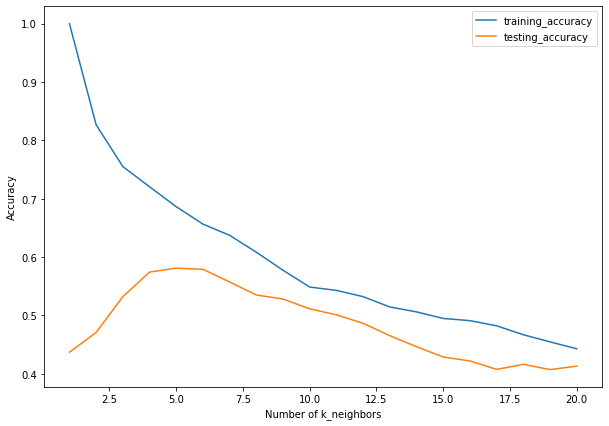

In [ ]:
#Build model and choose k:

#Set up
training_accuracy=[]
test_accuracy=[]

#try n_neighbors from 1 to 10
neighbors_setting = range(1,21)

#Train model:
for i in neighbors_setting:
  model = KNeighborsRegressor(n_neighbors=i)
  model.fit(X_train, y_train)
  training_accuracy.append(model.score(X_train, y_train))
  test_accuracy.append(model.score(X_test, y_test))

#PLot the result and choose K
plt.figure(figsize=(10,7))
plt.plot(neighbors_setting, training_accuracy, label = "training_accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "testing_accuracy")
plt.xlabel('Number of k_neighbors')
plt.ylabel('Accuracy')
plt.legend()

#Print best result for test set:


In [ ]:
print('best result for test set {}'.format(np.max(test_accuracy)))

best result for test set 0.5809593364795744


#### 1.3: Visualize KNN:

Text(0, 0.5, 'setosa')

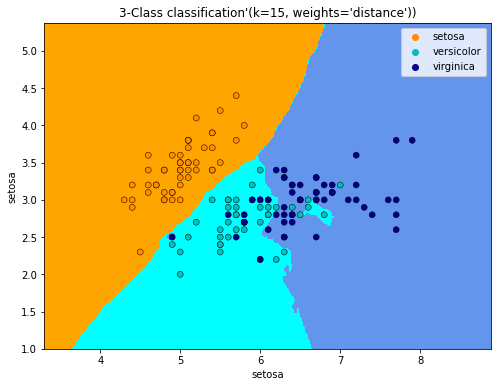

In [ ]:
from matplotlib.colors import ListedColormap

iris = load_iris()
# we only take the first two features for visulization purpose
# slicing by using a two-dim dataset
n_neighbors = 15

X = iris.data[:,:2]
y = iris.target

h = 0.02   # step size is the mesh

#Create color map:
cmap_light = ListedColormap(['orange','cyan', 'cornflowerblue'])
cmap_bold = ['darkorange','c','darkblue']

for weights in ['uniform','distance']:
    #We create an instance of Neighbour Classifier and fit the data
    clf = KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X,y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result in the color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize = (8,6))
plt.contourf(xx,yy,Z, cmap = cmap_light)

#Plot also the training plot
sns.scatterplot(x=X[:,0], y=X[:,1], hue = iris.target_names[y],
                palette = cmap_bold, alpha=1.0, edgecolor = 'black')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification'(k=%i, weights='%s'))"
          % (n_neighbors, weights))

plt.xlabel(iris.target_names[0])
plt.ylabel(iris.target_names[0])


## 2: Linear Model:

> In linear model we have two main tuning parameters is:
1. Polynomial + interaction term to control the complex of model (Increase fit)
2. L1 , L2 to regurlalization (Decrease fit).

      If we use L1 or L2, we have 1 hyperparameter is a to control how much of  generation.
       If model is overfitting you should set higher value for a
3. In other hand, we can use some method to choose best number of features (`PCA`, `Tree`, `subset-selection`) to reduce overfitting.


> Advantage:
1. Easy to explain for Linear Regression
2. Easy for train
3. Can use for non-linear dataset by using Polynomial + interaction term

> Disadvantage:
1. It's difficulte to find best Polynomial and interaction term
2. Preprocessing and feature extraction is kind of difficult


### 2.1: Linear Regression:




#### 2.1.1: Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
load_boston_data=load_boston()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(load_boston_data.data, load_boston_data.target, test_size=0.2, random_state=21)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-8.77422649e-02,  4.87770336e-02,  1.94746142e-02,  3.06314365e+00,
       -1.84821160e+01,  3.34704170e+00,  3.22024333e-03, -1.42569490e+00,
        3.25184188e-01, -1.20259158e-02, -1.05582832e+00,  1.07682087e-02,
       -5.38356500e-01])

In [ ]:
print('Score of model on X_train {}'.format(model.score(X_train, y_train)))
print('Score of model on y_train is {}'.format(model.score(X_test, y_test)))
print(mean_squared_error(y_test,model.predict(X_test)))

Score of model on X_train 0.7456728277014533
Score of model on y_train is 0.7149364161392229
26.82540057393923


#### 2.1.2: Polynomial Regression to increase fit:

> We need to increase the degree of fit to this model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_poly.coef_

array([-4.04743719e-08,  2.33350307e+00, -8.19533900e-02, -5.94531879e+00,
        3.24640436e+01,  9.93475359e+01,  1.42316168e+01,  9.62688835e-01,
       -9.27680448e+00,  1.60768617e+00,  4.39076902e-02,  4.36467534e+00,
        1.19266588e-01, -6.43550997e-01,  4.21046287e-03,  1.30989728e-01,
        4.74566892e-01,  2.51293387e+00, -1.21082516e+00,  1.92682188e-01,
       -6.02289543e-03, -1.80750087e-01,  5.20871317e-01, -4.27949958e-02,
        2.38859081e-01, -2.85933325e-04,  2.14468150e-02, -1.05092108e-03,
       -4.24596301e-03, -1.84016520e-02, -1.17195496e+00,  5.06913342e-02,
       -5.59417148e-04, -3.34148879e-03, -7.00812519e-03,  6.19900744e-04,
        1.18288347e-03,  6.33768795e-04, -4.46344043e-03,  4.13135920e-02,
        5.56122824e-01,  2.30167922e+00,  3.49804765e-01,  2.94608564e-03,
        2.21975820e-01, -4.97641429e-02,  3.81306410e-04,  1.75144187e-02,
        1.63134943e-03, -1.32265633e-02,  3.24640450e+01, -3.60811877e+01,
       -5.79628679e+00,  

In [ ]:
print('Score of model on X_train {}'.format(model_poly.score(X_train_poly, y_train)))
print('Score of model on y_train is {}'.format(model_poly.score(X_test_poly, y_test)))
print(mean_squared_error(y_test,model_poly.predict(X_test_poly)))

Score of model on X_train 0.9408125342022848
Score of model on y_train is 0.827985884708533
16.187081789159645


#### 2.1.3: Ridge Regression:

> There are the difference between score of train set and test set.

> Model is overfitting. 

> We will try to use Ridge Regression to shink parameters to zero (Not equal to zero)

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=0.00001)
rid.fit(X_train_poly, y_train)
y_pred=rid.predict(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.65546e-19): result may not be accurate.
  overwrite_a=True).T


In [ ]:
rid.coef_

array([ 0.00000000e+00,  2.33612923e+00, -8.22913210e-02, -5.94313312e+00,
        3.24651875e+01,  9.89683383e+01,  1.42252431e+01,  9.62896127e-01,
       -9.28015103e+00,  1.60775276e+00,  4.38880761e-02,  4.35790285e+00,
        1.19273506e-01, -6.43615417e-01,  4.21067348e-03,  1.31122135e-01,
        4.74560246e-01,  2.51303096e+00, -1.21063249e+00,  1.92715601e-01,
       -6.02321673e-03, -1.80761842e-01,  5.20950240e-01, -4.27993004e-02,
        2.38766566e-01, -2.85968195e-04,  2.14493797e-02, -1.05059679e-03,
       -4.24519138e-03, -1.84101241e-02, -1.17169464e+00,  5.06918559e-02,
       -5.59540134e-04, -3.33818826e-03, -7.00846021e-03,  6.19907913e-04,
        1.18778545e-03,  6.33976913e-04, -4.46270483e-03,  4.13146340e-02,
        5.56134054e-01,  2.30016723e+00,  3.49754409e-01,  2.94631109e-03,
        2.21904706e-01, -4.98053178e-02,  3.81483543e-04,  1.74732775e-02,
        1.63122771e-03, -1.32272701e-02,  3.24651877e+01, -3.60805071e+01,
       -5.79655798e+00,  

In [ ]:
print('Score of model on X_train {}'.format(rid.score(X_train_poly, y_train)))
print('Score of model on y_train is {}'.format(rid.score(X_test_poly, y_test)))
print('Mean square error is {}'.format(mean_squared_error(y_test,rid.predict(X_test_poly))))

Score of model on X_train 0.915398913019528
Score of model on y_train is 0.8268322301069329
Mean square error is 16.295644399622745


#### 2.1.4: Lasso Regression:

> Another version of regurlarization for Linear Regression.

> But for Lasso model, parameters will be actually shrinked to zero value.

> For some case, Lasso model is considered as feature selection.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lass = Lasso(alpha=0.5)            #As you can see above, parameters is near to zero, so we need to set small alpha
lass.fit(X_train_poly, y_train)
y_pred=lass.predict(X_test_poly);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2047.504629757504, tolerance: 3.311185306930693
  positive)


In [ ]:
print('Score of model on X_train {}'.format(lass.score(X_train_poly, y_train)))
print('Score of model on y_train is {}'.format(lass.score(X_test_poly, y_test)))
print('Mean square error is {}'.format(mean_squared_error(y_test,y_pred)))

Score of model on X_train 0.8936484898776121
Score of model on y_train is 0.8594589924230499
Mean square error is 13.225361072980782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


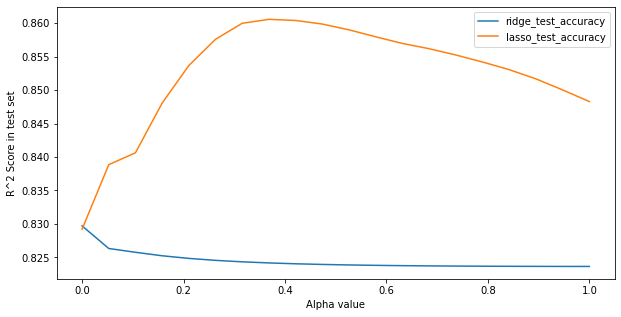

In [ ]:
# Compare Lasso vs Ridge
# For Ridge and Lasso, we only have one hyperparameters is alpha. Let put in chart and compare
#Build model and choose k:

#Set up
ridge_test_accuracy=[]
lasso_test_accuracy=[]

#try n_neighbors from 1 to 10
alpha_list = np.linspace(0,1, num=20)


#Train model:
for i in alpha_list:
  ridge = Ridge(alpha=i)
  lasso = Lasso(alpha=i)


  ridge.fit(X_train_poly, y_train)
  lasso.fit(X_train_poly, y_train)

  ridge_test_accuracy.append(ridge.score(X_test_poly, y_test))
  lasso_test_accuracy.append(lasso.score(X_test_poly, y_test))

#PLot the result
plt.figure(figsize=(10,5))
plt.plot(alpha_list, ridge_test_accuracy, label = "ridge_test_accuracy")
plt.plot(alpha_list, lasso_test_accuracy, label = "lasso_test_accuracy")
plt.xlabel('Alpha value')
plt.ylabel('R^2 Score in test set')
plt.legend();
#Print best result for test set:


#### Summary for Linear Regression: 
- Firstly, We build a linear regression model, but the accuracy is low. Cause data is not linear.
- Secondly, We use polynomial, including both polynomial and interaction term to boost the fit of model.
- Thirdly, We use Lasso and Ridge to increase test accuracy and reduce overfitting


1.   For Ridge, test accuracy don't increase. Cause, our params is near to zero and Ridge never shrink params to zero. So no improment is this case.
2.   For Lasso, test accuracy improve from 82% to 86% when we use a = 0.4. Cause some params shrink to zero. In other words, some features be removed and overfitting reduce.



### 2.2: Logistics Regression:

> Logistics Regression is Linear Function with sigmoid function

> Tuning of Logistics Regression is:
1. We can use regularlization term L1, L2 same as Linear Regression.
2. We also can use polynomial to increase the complex of model.
3. But in Logistics Regression we have C. With higher C model tend to get overfitting gradually

    C control the fit of model.  
    Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, 
    while using a higher value of C stresses the importance that each individual data point be classi‐fied correctly.

> We don't need to do standard scaler before fit data into logistics regression

In [ ]:
cancer= load_breast_cancer()

In [ ]:
print('load breast cancer data {}'.format(cancer.data.shape))
print('load breast cancer data {}'.format(cancer.target.shape))


load breast cancer data (569, 30)
load breast cancer data (569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=21)
pipe = make_pipeline(StandardScaler(), )

logreg= LogisticRegression(C=0.1).fit(X_train, y_train)
print('Training set score: {}'.format(logreg.score(X_train, y_train)))
print('Test set score: {}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9413145539906104
Test set score: 0.9440559440559441


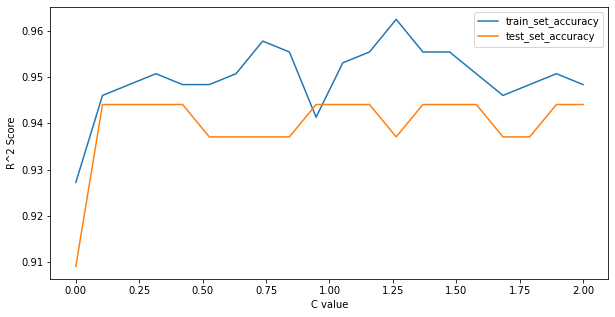

In [ ]:
#In Logistics regression we have C as regurlarlization value (smaller C, higher regurlaliztion)
#Let check what happen if we use other C value
import numpy as np
import matplotlib.pyplot as plt

train_score=[]
test_score =[]

list_of_c = np.linspace(0.00001,2,20)

for i in list_of_c:
  model = LogisticRegression(C=i)
  model.fit(X_train, y_train)
  train_score.append(model.score(X_train,y_train))
  test_score.append(model.score(X_test,y_test))

#PLot the result
plt.figure(figsize=(10,5))
plt.plot(list_of_c, train_score, label = "train_set_accuracy")
plt.plot(list_of_c, test_score, label = "test_set_accuracy")
plt.xlabel('C value')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()


## 3: Naive Bayes Classifier:

> We have 3 types of Naive Bayes in sklearn: GaussianNB, BernoulliNB, and MultinomialNB.

> `In practice, we don't priority Naive Bayes Classifier`. Cause the Naive Bayes need features are linear dependently and features have specific distribution. It rarely happen in practice.

1.   GaussianNB for any contionus data
2.   BernoulliNB assumes binary data
3.    MultinomialNB assumes count data (each feature represents an integer count of some‐ thing, like how often a word appears in a sentence)

`BernoulliNB and MultinomialNB are mostly used in text data classification`

> Advantage:  
1. Naive Bayes is faster in training
2. Can use for large dataset

> Disadvantage:
1. Overfitting to much, when compare with Logistics Regression and LinearSVC. The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.  (Naive assumption)
2. Discover distribution of y is hard


In [ ]:
features, target = load_wine(return_X_y=True)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3,
                                                    random_state = RANDOM_STATE)

In [ ]:
#Using PCA + GNB:
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB() )
unscaled_clf.fit(X_train, y_train)

pred_test = unscaled_clf.predict(X_test)

In [ ]:
#Using Scaler + PCA + GNB
scaled_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
scaled_clf.fit(X_train, y_train)

pred_test_std = scaled_clf.predict(X_test)

In [ ]:
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%



## 4: Tree:

> Tree can be the most popular algorithm in classification of classic ML.
> Most important tuning hyperparameter of tree is depth of tree (tree pruning)

> Advantage:
1. Easy to explain for why choose node and features important.
2. Can work for both categorical data and numeric data. So it saves a ot of time for us in preprocessing data.

> Disadvantage:
1. When we groww tree we have to limit a depth of tree, cause tree is kind of easily get overfitting.



### 4.1: Classification tree

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
# One aspects of tree is that: It's too randomness. Every time we build a tree we get different result. 
# So we use random_state to get same result every time
tree.fit(X_train, y_train)

print('Accuracy on train set {}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set {}'.format(tree.score(X_test, y_test)))

Accuracy on train set 1.0
Accuracy on test set 0.9122807017543859


In [ ]:
# As we can see the accuracy on train set is 1.0. 
#It's mean overfitting let change depth of tree to reduce overfitting

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on train set {}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set {}'.format(tree.score(X_test, y_test)))

Accuracy on train set 0.9868131868131869
Accuracy on test set 0.9473684210526315


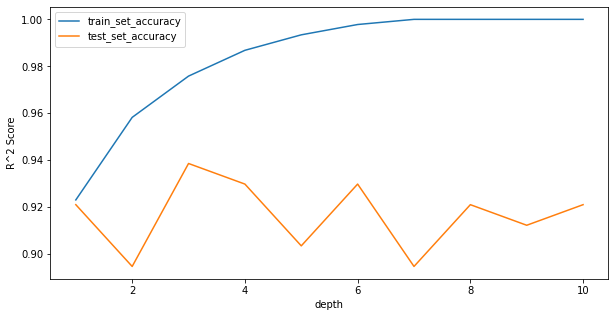

In [ ]:
#In Logistics regression we have C as regurlarlization value (smaller C, higher regurlaliztion)
#Let check what happen if we use other C value
import numpy as np
import matplotlib.pyplot as plt

train_score=[]
test_score =[]

list_of_depth = range(1,11)

for i in list_of_depth:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  train_score.append(model.score(X_train,y_train))
  test_score.append(model.score(X_test,y_test))

#PLot the result
plt.figure(figsize=(10,5))
plt.plot(list_of_depth, train_score, label = "train_set_accuracy")
plt.plot(list_of_depth, test_score, label = "test_set_accuracy")
plt.xlabel('depth')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()


In [ ]:
# Let visualize tree:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)


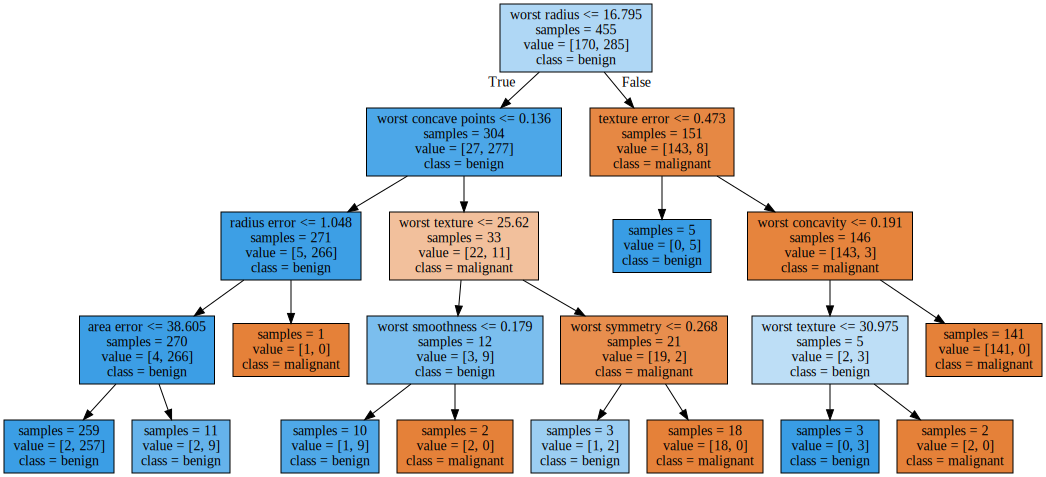

In [ ]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

feature importantce: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00954637 0.04578469
 0.         0.00315729 0.         0.         0.         0.
 0.         0.         0.73354757 0.04416574 0.         0.
 0.01332729 0.         0.01716116 0.12202752 0.01128236 0.        ]


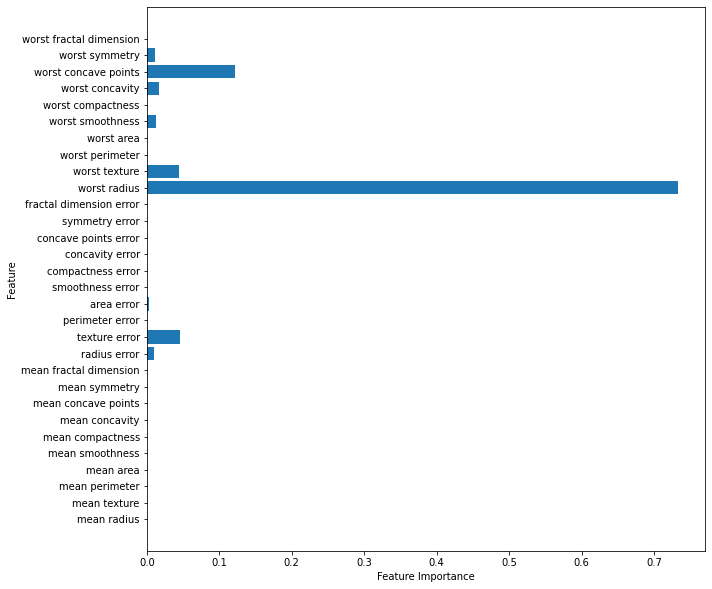

In [ ]:
# By using tree, we can calculate feature important in trees
# Feature importance, which rates how important each feature is for the decision a tree makes.
# It is a number between 0 and 1 for each feature,
             # where 0 means “not used at all” and 1 means “perfectly predicts the target

print('feature importantce: \n {}'.format(tree.feature_importances_))             

#Visualize features important
def plot_features_importances_cancer(model):
  plt.figure(figsize=(10,10))
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature')
plot_features_importances_cancer(tree)

#Important features are root node and node near root node

### 4.2: Decision Tree regression

> For Regression tree, we do same with Classification task.

> But we will calculate mean at each node space and use as prediction value

In [ ]:
from sklearn.datasets import load_diabetes
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2)

In [ ]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
pred_tree = tree.predict(X_test)
pred_lr = linear_reg.predict(X_test)

In [ ]:
print('Accuracy for train set of tree regression {}'.format(tree.score(X_train, y_train)))
print('Accuracy for test test of tree regression {}'.format(tree.score(X_test, y_test)), '\n')

print('Accuracy for train set of linear regression {}'.format(linear_reg.score(X_train, y_train)))
print('Accuracy for test test of linear regression {}'.format(linear_reg.score(X_test, y_test)), '\n')

print('MSE of tree regression {}'.format(mean_squared_error(pred_tree, y_test)))
print('MSE of linear regression {}'.format(mean_squared_error(pred_lr, y_test)))



Accuracy for train set of tree regression 1.0
Accuracy for test test of tree regression -0.4063585791188291 

Accuracy for train set of linear regression 0.5119290720112484
Accuracy for test test of linear regression 0.49525306869929775 

MSE of tree regression 7181.3707865168535
MSE of linear regression 2577.4186760378275


#### Look at this data we can conclude that:
- Tree is super overfitting, we can reduce overfitting by reduce depth of tree
- Linear regression is underfitting, data is not linear, so model is not complex enough, let do polynomial regression + interaction term


## 5: Ensemble Tree Learning:

> Using ensemble method in Statistical to reduce overfitting. By grow a lot of tree and combine these im some ways

> 5.1: Random Forest:
- Build a tree on subset of data. Then average value to have optimization value.
- Tuning hyperparameter: Number of tree in forest.

> 5.2: Boosting:
- Boosting use all data to grow tree iteratively. Base on wrong prediction from previous tree.
- Tuning hyperparameter: Number of tree, Learning rate use for weighted next tree, max depth 


> Advantage: 
1. Reduce overfitting.

> Disadvantage: 
1. Take time to train, it's more difficult than tree to explain. 




### 5.1: Random Forest.

> Tuning parameter of Random Forest:
1. `Max_depth`
2. `N_estimartor`
3. min_sample_split: if any terminal node has more than two observations and is not a pure node, we can split it further into subnodes. `(set_default =2)`
4. max_terminal_nodel: `Set Default =2`. 
5. min_sample_leaf: `Minimum number of samples at each leaf`.
6. max_features: This resembles the number of `maximum features provided to each tree` in a random forest.
7. max_samples: The max_samples hyperparameter determines `what fraction of the original dataset is given to any individual tree`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [ ]:
make_moons

<function sklearn.datasets._samples_generator.make_moons>

In [ ]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test, y_train, y_test = train_test_split(X,y , stratify =y, random_state=42)

forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.920


In [ ]:
# Let do with cancer data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)  #Build 100 trees
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


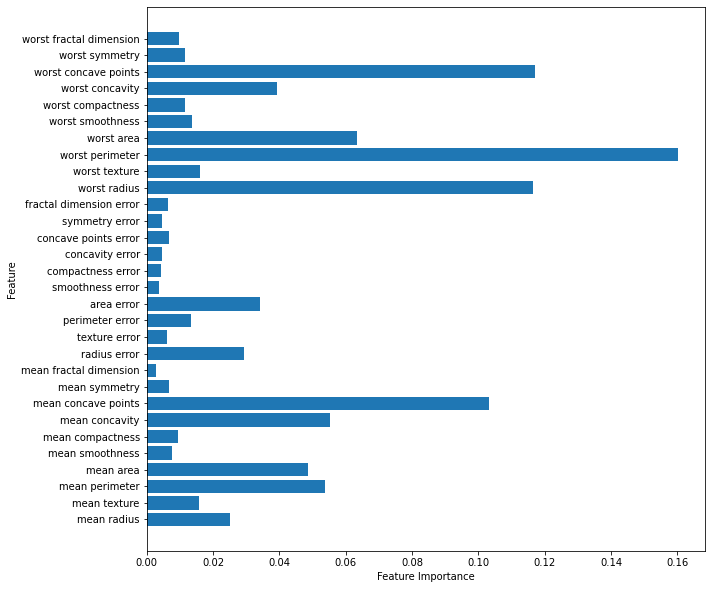

In [ ]:
#Visualize features important
def plot_features_importances_cancer(model):
  plt.figure(figsize=(10,10))
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature')
plot_features_importances_cancer(forest)

In [ ]:
# We also have randomforest for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=3000)
regr.fit(X, y)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.8462157266680017
0.8454348811334403


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#With GradientBoostingRegressor we have higher accuracy

gbrt = GradientBoostingRegressor(random_state=0, n_estimators=1000)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.962


### 5.2: Gradient Boost Learning:

> Tuning parameter of Random Forest:

1. `Max_depth`
2. `N_estimartor`
3. min_sample_split: if any terminal node has more than two observations and is not a pure node, we can split it further into subnodes. `(set_default =2)`. With `higher value of min_sample_split model can avoid overfitting.`
4. max_terminal_nodel: `Set Default =2`. 
5. min_sample_leaf: `Minimum number of samples at each leaf`.
6. max_features: This resembles the number of `maximum features provided to each tree` in a random forest.
7. max_samples: The max_samples hyperparameter determines `what fraction of the original dataset is given to any individual tree`
8. Learning rate (Improve speed when building next tree)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=1000)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [ ]:
# With the accuracy on training is 1, we get overfitting
brt = GradientBoostingClassifier(random_state=0, max_depth=2)     #Recuce depth
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)  
#By setting learning_rate we reduce fitting
#Learning rate shrinks the contribution of each tree by learning_rate. 
#There is a trade-off between learning_rate and n_estimators. 
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


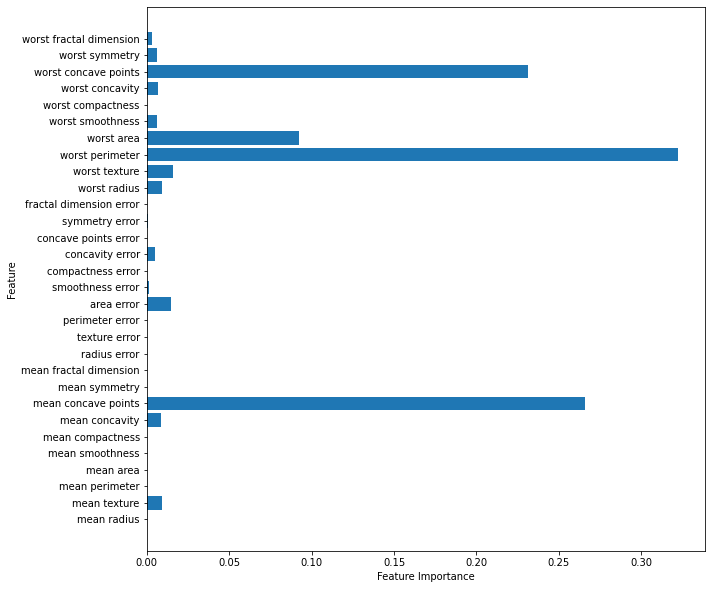

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_features_importances_cancer(gbrt)         #Using function building before to visualize important of features

### 5.3: Let comapre SVC vs Tree:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_wine(return_X_y=True)
y = y == 2
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)


In [ ]:
svc = SVC(random_state=21)
svc.fit(X_train,y_train)

rfc = RandomForestClassifier(n_estimators=10,random_state=21)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

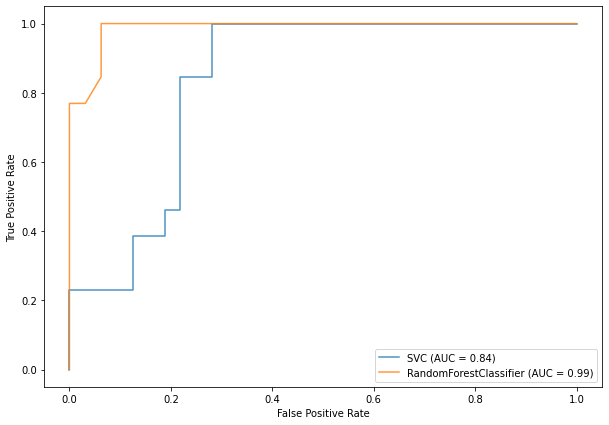

In [ ]:
plt.figure(figsize=(10,7))
ax=plt.gca()      #gca means "get current axes".

svc_disp = plot_roc_curve(svc, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
#plt.show()

### 5.4: Gradient Boosting regularization

In [ ]:
from sklearn import ensemble
from sklearn import datasets

In [ ]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)


In [ ]:
# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

In [ ]:
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]


In [ ]:
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

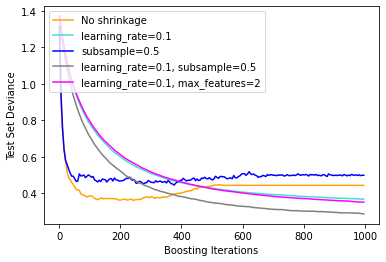

In [ ]:
for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:

    params = dict(original_params)
    params.update(setting)          #Insert values for tuning parameters

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

## 6:Kernelized Support Vector Machines: 
Support vector machines `(SVMs)` are a set of supervised learning methods `used for classification, regression and outliers detection.`



> For kernelized SVM, we have some hyperparameters:

1. Type of kernel
2. Gamma parameter for the width of kernel
3. C parameter for control regurlarization

> Advantages: Kernelized support vector machines are powerful models and perform well on a vari‐ety of datasets. Effective in high dimensional spaces.
SVMs allow for complex decision boundaries, even if the data has only
a few features.

> Disadvantages: 
1. Processing data take time 
2. Run‐ning an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.
3. Hard to explain when compare with tree. (Acutally we always should priority tree)
4. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

### 6.1: SVM: Maximum margin separating hyperplane

We use Linear SVC or SVM with kernel = linear.

Note that: For Linear SVC we only have C as tuning parameter not gamma

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = SVC(kernel='linear', C=1000)         
#We use C to control the fit. In linear SVC we don't have gamma parameter
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

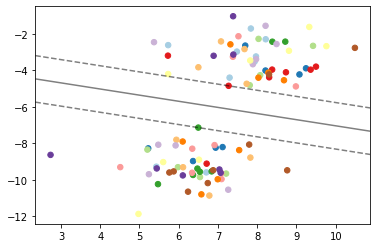

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()                      #get the current polar axes on the current figure
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
# Pick support vector
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### 6.2: SVM: SVC with other kernel:

Note that: For Non-Linear SVC we have C and gamma as 2 main tuning parameter 

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

X = X[y != 0, :2]          #For visualization purpose we only take feature of iris data
y = y[y != 0]

assert len(np.unique(y)) == 2

In [ ]:
n_sample = len(X)

np.random.seed(0)
#shuffle data
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    shuffle = True, stratify = y, test_size =0.2)

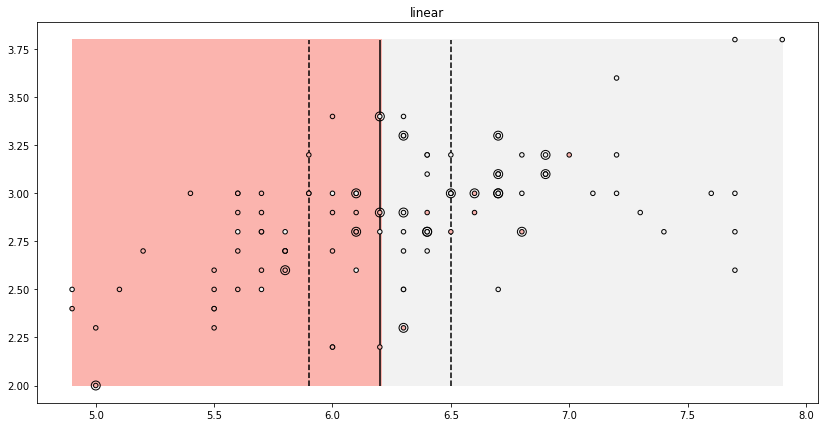

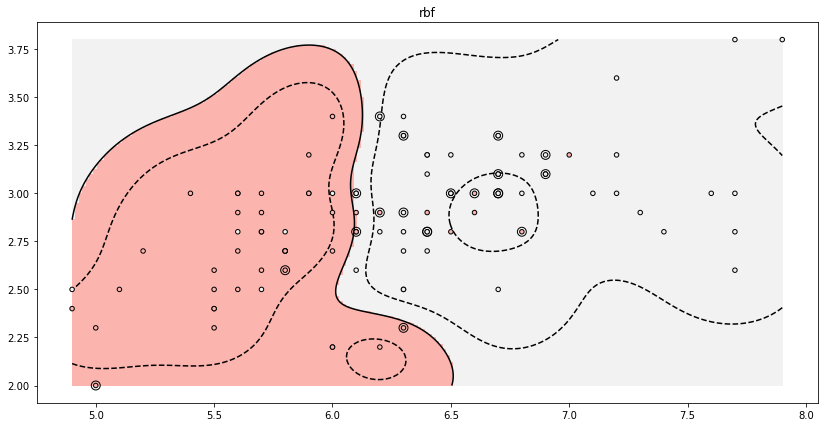

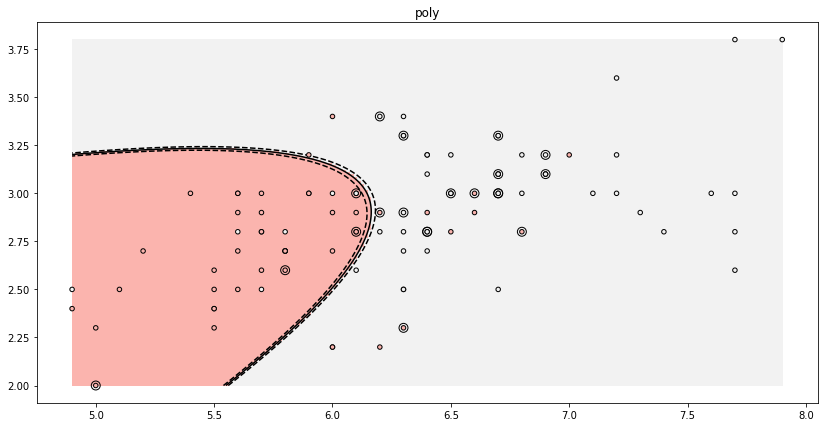

In [ ]:
#Fit the model and visualize:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    clf =SVC(kernel =kernel , gamma =10)
    clf.fit(X_train, y_train) 

    plt.figure(figsize = (14,7))
    plt.clf()
    plt.scatter(X[:,0], X[:,1], c=y,
                zorder=10, cmap = plt.cm.Pastel1,
                edgecolor = 'k', s=20)
    
    #Circle out the test data
    plt.scatter(X_test[:,0], X_test[:,1], s=80, 
                facecolors ='none',     #facecolors = 'none' mean circle out test data
                zorder=10, edgecolor='k')
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Pastel1)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()




# II: Model Evaluation and Improvement

> We have someway to improve accuracy of model

## 1: Cross Validation:

>  In crossvalidation, the data is instead split repeatedly and multiple models are trained
 
> The most commonly used version of cross-validation is `k-fold  cross-validation`, where k is a user-specified number, `usually 5 or 10`

> Where k is increase we have more value for train at each fold. So the model tend to reduce bias and increase variance. 

> LOOCV = Leave one out cross validation, we use n-1 samples for each fold.


### 1:1: K-Fold for Regression model:

In [ ]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)   # Calculate scores at each fold  
                                                                 # In default , cv=5
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.98 0.96 0.98]
Average cross-validation score: 0.97


### 1.2: K-Fold for Classification Model:

> In case of classification task, if data set is very skew. Randomness in picking sample will be bad, cause our sample can get all data of popular class.

> We have two way to fit this problem


1. Shuffle data = True
2. Using LOOCV or increase number of K

In [ ]:
#For example, when we use iris data and set k=2, the result is bad cause of randomness
iris = load_iris()
kfold = KFold(n_splits=2)

#print("Iris labels:\n{}".format(iris.target))
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.29333333 0.33333333]


In [ ]:
# Shuffle = True
kfold = KFold(n_splits=2, shuffle=True, random_state=0)          #We use shuffle = true to reduce randomness
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.93333333 0.97333333]


In [ ]:
# Or we can use LOOCV with k = n-1:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


### 1.3: Shuffle-split cross-validation

> Shuffle-split cross-validation allows for `control over the number of iterations` inde‐
pendently `of the training and test sizes`, which can sometimes be helpful.




In [ ]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.2, n_splits=10)     
#We only take 50% of data for training set and 20% of data for testding data


logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.94666667 0.92       0.94666667 0.96       0.94666667 0.90666667
 0.94666667 0.77333333 0.96       0.96      ]


## 2: Grid Search:

> How to find the best hyperparamaters for model. The most commonly used
method is `grid search`, which basically means `trying all possible combinations of the
parameters` of interest

### 1: Simple Grid Search: (implementation of GridSearch)

In [ ]:
#Consider the case of a kernel SVM with an RBF kernel, as implemented in the SVC class.
# We have two important parameters: 
# 1. the kernel bandwidth, gamma
# 2. the regularization parameter, C.

#Let try to find best hyperparameters by using grid search


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set:, {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set:, 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [ ]:
# In practice we should use validation set, to choose hyper parameter
# Then train with this hyper parameters for all data (including train + valid) and test on test set
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split( X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 2: Grid Search with Cross Validation:

> Instead of using a single split into a training and a validation set, we can `use cross-validation` to
`evaluate the performance of each parameter combination`. 

In [ ]:
#Then we will change a little in code block above
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        
        # With each gamma and C
        # Instead of devide X_trainval into X_train, X_valid, we do cross validation with cv=5
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

print(svm.score(X_test, y_test))

0.9736842105263158


### 3: GridSearchCV in sklearn:

> Idea of GridSearchCV (GridSearch with Cross Validation):

1. Devide data into training set and test set
2. Set a Grid of parameters
3. Adapt cross validation for training data
4. Find best params retrained model and apply for test set. 

In [ ]:
#Set a params grid in format of dictionary

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
#Explain: 
#1. At each fold, we find best hyperparameter.
#2. Then we calculate best result by calculating average

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(grid_search.get_params)
print('-------------')
print('with',grid_search.param_grid, 'we have result like this for each params set'); print('\n')

print(grid_search.cv_results_['split1_test_score'])

Test set score: 0.97
<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>
-------------
with {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} we have result like this for each params set


[0.34782609 0.34782609 0.34782609 0.34782609 0.34782609 0.34782609
 0.3

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [ ]:
#We can create a df to contain the result of GridSearchCV

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000886,0.000222,0.000478,0.000221,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000685,0.000098,0.000362,0.000117,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000606,0.000009,0.000263,0.000008,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000603,0.000014,0.000259,0.000010,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000634,0.000041,0.000275,0.000016,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


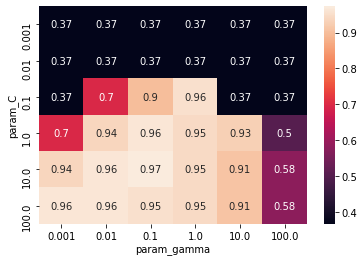

In [ ]:
pivot = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
sns.heatmap(data=pivot, annot = True)

### 4: Combine some version of 1 algorithms:

> In some case, we can combine some algorithms in one search time

> Note that: Cause of data processing for each algorithm is difference, so we should not combine other algorithm in 1 gridsearch CV

In [ ]:
#Create a grid
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


# III: ML pipeline + GridSearch:

> Time to do ML process automatically and create a `template for every ML model`

In [ ]:
#First we need to have data to practice.
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


## 1: What is pipeline in sklearn:

     The `Pipeline` class is a class that allows `“gluing”` together `multiple processing steps` into a single scikit-learn estimator.

1. Create pipe line: We use `make_pipeline`

   Example:
-  pipeline = `make_pipeline`(MinMaxScaler(), SVC(C=100))

-  pipeline = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())



2. After creating a pipeline, we can treat pipeline as ML model:

- Fit X_train and y_train... pipeline.fit(X_train, y_train)

- Or `use pipeline with grid search` ......  grid = GridSearchCV(pipe, param_grid=param_grid, cv=5) 

3. After using pipeline with gridsearch, we can check attribute of gridsearch or pipeline attributes:

- grid.best_score_ ,  grid.score(X_test, y_test), grid.best_params_, grid.best_estimator_ , grid.cv_results_

- pipe.named_steps, pipe.steps

### 1.1: Create pipeline with Pipeline:

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()),('svm',SVC())])           #We will do MinMaxScaler + SVC
print(pipe.steps)

[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


In [ ]:
pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.97


### 1.2: Convenient Pipeline Creation with make_pipeline "Priority"

In [ ]:
from sklearn.pipeline import make_pipeline

#Standard syntax:
pipe_long = Pipeline([('scaler',MinMaxScaler()), ('svm', SVC(C=100))])

#abbreviated syntax.
# We don't need to set a name each step:
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


In [ ]:
#Other example:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))

Pipeline steps:
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


## 2: Using Pipeline in GridSearchCV:

    Frow now we can use this template for every ML model in sklearn

In [ ]:
#Create pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=5), MinMaxScaler(), SVC())
#Create grid
param_grid = {'svc__C':[0.001, 0.01,0.1,1,10,100],                   #Syntax have to in the form svm__ 
              'svc__gamma':[0.001,0.01,0.1,1,10,100]}
#Do gridsearchCV with pipeline
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)               #Using pipeline in GridSearch
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.94
Best parameters: {'svc__C': 1, 'svc__gamma': 10}


In [ ]:
print(pipe.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


## 3: Working with pipeline in GrisSearch CV:

### 3.1: Accessing step with attributes with pipe.named_steps:

             pipe.named_steps

> We can access each step in pipeline as do with independence ML task

In [ ]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=5), StandardScaler(), SVC())

# fit the pipeline defined before to the cancer dataset
pipe.fit(X_train, y_train)
# Extract the first two principal component from the pca steps
components_1 = pipe.named_steps['pca'].components_[:1]
print("components.shape: {}".format(components_1))
print('\n')
# Extract other step in pipeline:
components_2 = pipe.named_steps['standardscaler-2'].get_params()
print(components_2)

components.shape: [[0.22136524 0.10000219 0.22951811 0.22352098 0.14302288 0.24211071
  0.26026925 0.26425272 0.1342154  0.058505   0.20686479 0.00729622
  0.20987422 0.20223841 0.01725187 0.16639025 0.13855921 0.17994092
  0.02943904 0.10192967 0.23041956 0.100572   0.23779661 0.22751009
  0.13135979 0.21077884 0.2301419  0.25334406 0.11911651 0.13088259]]


{'copy': True, 'with_mean': True, 'with_std': True}


### 3.2: Accessing Attributes in a Pipeline inside GridSearchCV

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_clas

In [ ]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [ ]:
# To access Logistics Regression step  we use 
# best_estimator in GridSearchCV
# named_steps in pipeline
print("Logistic regression step:\n{}".format(grid.best_estimator_.named_steps["logisticregression"]))
print('\n')
print(X_train.shape[1])
print('\n')
print("Logistic regression coefficients:\n{}".format(grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression step:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


30


Logistic regression coefficients:
[[-0.43570655 -0.34266946 -0.40809443 -0.5344574  -0.14971847  0.61034122
  -0.72634347 -0.78538827  0.03886087  0.27497198 -1.29780109  0.04926005
  -0.67336941 -0.93447426 -0.13939555  0.45032641 -0.13009864 -0.10144273
   0.43432027  0.71596578 -1.09068862 -1.09463976 -0.85183755 -1.06406198
  -0.74316099  0.07252425 -0.82323903 -0.65321239 -0.64379499 -0.42026013]]


## 4: Application of pipeline + gridsearch:

### 4.1: Using pipeline + gridsearchcv to find best tuning parameters:

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [ ]:
# Create pipeline
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

# Create grid to seach all best params
param_grid = {'polynomialfeatures__degree':[1,2,3],             
              'ridge__alpha':[0.001,0.01,0.1,1,10,100]}           
#in param_grid we need to write right format of ML pipelien step


# Now we can run our GridSearch
grid = GridSearchCV(pipe, param_grid= param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                         

In [ ]:
print(grid.best_params_)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


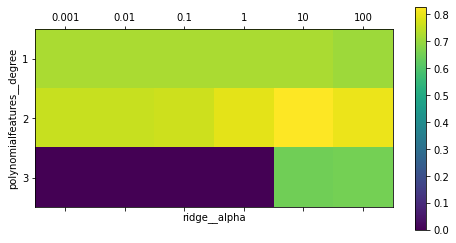

In [ ]:
#Then we can show param_grid chart as below

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")

plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
param_grid['polynomialfeatures__degree'])
plt.colorbar()

### 4.2: Using pipeline + gridsearchcv to find best model:

In [ ]:
#Here we will compare SVC and RandomForestClassifier

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
#We only need set pipe for SVC cause RandomForestClassifier need no precosessing


param_grid = [
              {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
               'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
               'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              
              {'classifier': [RandomForestClassifier(n_estimators=100)],
               'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki...
                                            

In [ ]:
print("Best params:\n{}\n".format(grid.best_params_))
print('\n')
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print('\n')
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}



Best cross-validation score: 0.99


Test-set score: 0.98


#### We obtained close to 90% accuracy without learning anything.

> Cause our data set is very skew. Now we will try to build a real classifier model        

## 1.22: Confusion Matrix:

> One of the most comprehensive ways to represent the result of evaluating binary clas‐
sification is using `confusion matrices`. 

In [ ]:
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix:
[[402   1]
 [  6  41]]
Confusion matrix:
[[390  13]
 [ 24  23]]


Text(0.5, 1.0, 'confusion_tree')

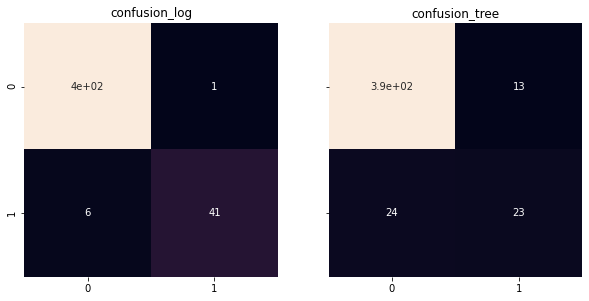

In [ ]:
confusion_log = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion_log))


#Compare with decision tree
confusion_tree = confusion_matrix(y_test, pred_tree)
print("Confusion matrix:\n{}".format(confusion_tree))

#Visualize the result
sns.color_palette("tab10")
fig,axes = plt.subplots(1,2, figsize = (10,5),sharex=True, sharey=True)
sns.heatmap(confusion_log, square=True, annot=True, cbar=False, ax = axes[0])
sns.heatmap(confusion_tree, square=True, annot=True, cbar=False, ax = axes[1])

axes[0].set_title('confusion_log')
axes[1].set_title('confusion_tree')



#axes.set_xlabel('predicted value')
#plt.ylabel('true value');


#### Look at the result above:

- Logistics regression is better than tree, cause:
1. Total number of true prediction (402+41) > (390+23)

- For real positive value of log model, model get 6 wrong prediction (6/(41+6)). Same for real negative value.

#### 1.2:1: Relation to Accuract,  Precision and Recall:

1. Accuracy = (TP + TN ) / (TP + TN + FP +FN)
2. Precisions = TP / (TP+FP)
>`Precision` is used as a performance metric when `the goal is to limit the number of false positives`. 

3. Recall  = TP / (TP + FN)
>`Recall` is used as performance metric when we need to `identify all positive samples`
>Note: There are trade off between precision and recall:

4. F = 2*(precision *recall) / (precision + recall)


#### 1.22.2: Precision-recall curves and ROC curves

>  `Changing the threshold` that is used to make a `classification decision or predict_prob` in a model is a way to `adjust the trade-off of precision and recall` for a given classifier. 

In [ ]:
from sklearn.metrics import precision_recall_curve


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
#To use precision_recall_curve we need to calculate predict_proba in classification task


plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")